**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from sklearn import preprocessing
from keras.layers import Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,MaxPool2D
from keras.layers import Dense,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import pprint
import tensorflow as tf

**Import Dataset**

In [2]:
# Load the dataset
stock = pd.read_csv('/content/CIPLA.csv')

In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6044 non-null   object 
 1   Symbol              6044 non-null   object 
 2   Series              6044 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                6044 non-null   float64
 5   High                6044 non-null   float64
 6   Low                 6044 non-null   float64
 7   Last                6044 non-null   float64
 8   Close               6044 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              6044 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 708.4

**Data Preprocessing**

In [4]:
stock = stock.drop(['Symbol', 'Series', 'Prev Close', 'VWAP', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

In [5]:
# Data preprocessing
window_size = 50
X = []
Y = []

for i in range(len(stock) - window_size - 1):
    first = stock.iloc[i, 5]
    temp = [(stock.iloc[i + j, 5] - first) / first for j in range(window_size)]
    temp2 = [(stock.iloc[i + window_size, 5] - first) / first]
    X.append(np.array(temp).reshape(50, 1))
    Y.append(np.array(temp2).reshape(1, 1))

**Train-test split**

In [6]:
# Train-test split
train_X, test_X, train_label, test_label = train_test_split(X, Y, test_size=0.2, shuffle=False)
len_t = len(train_X)

**Convert to numpy arrays**

In [7]:
# Convert to numpy arrays
train_X = np.array(train_X).reshape(len(train_X), 50, 1)
test_X = np.array(test_X).reshape(len(test_X), 50, 1)
train_label = np.array(train_label)
test_label = np.array(test_label)

**Model Building**

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 64)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 bidirectional (Bidirection  (None, 24, 100)           46000     
 al)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 100)           0         
                                                                 
 flatten (Flatten)           (None, 2400)              0

In [9]:
# Model building
model = Sequential()

#add model layers
model = Sequential()
# Add Conv1D layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size, 1)))
model.add(MaxPooling1D(pool_size=2))
# Add Bidirectional LSTM layer
model.add(Bidirectional(LSTM(50, return_sequences=True)))
# Flatten the output
model.add(Flatten())
# Add Dense output layer
model.add(Dense(1))

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 48, 64)            256       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 bidirectional_1 (Bidirecti  (None, 24, 100)           46000     
 onal)                                                           
                                                                 
 flatten_1 (Flatten)         (None, 2400)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2401      
                                                                 
Total params: 48657 (190.07 KB)
Trainable params: 4865

**Compile the model**

In [10]:
# Compile the model
model.compile(optimizer='RMSprop', loss='mse')

**Defining the EarlyStopping callback**

In [11]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

**Model Training and Evaluation**

In [12]:
# Model training
model.fit(train_X, train_label, validation_data=(test_X, test_label), epochs=20, batch_size=64, shuffle=False, callbacks=[early_stopping])

# Model evaluation
loss = model.evaluate(test_X, test_label)
print("Test Loss:", loss)

Epoch 1/20
75/75 [==============================] - 10s 40ms/step - loss: 0.0101 - val_loss: 0.0028
Epoch 2/20
75/75 [==============================] - 1s 15ms/step - loss: 0.0054 - val_loss: 0.0019
Epoch 3/20
75/75 [==============================] - 1s 14ms/step - loss: 0.0043 - val_loss: 0.0016
Epoch 4/20
75/75 [==============================] - 1s 20ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 5/20
75/75 [==============================] - 2s 22ms/step - loss: 0.0032 - val_loss: 0.0013
Epoch 6/20
75/75 [==============================] - 1s 16ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 7/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 8/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 9/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0023 - val_loss: 9.9766e-04
Epoch 10/20
75/75 [==============================] - 1s 8ms/step - loss: 0.0022 - val_loss: 9.5424e-04
Epoc

**Plotting**

In [13]:
# Plotting
predicted  = model.predict(test_X)
test_label = (test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
for j in range(len_t , len_t + len(test_X)):
    temp =stock.iloc[j,4]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

38/38 [==============================] - 1s 4ms/step


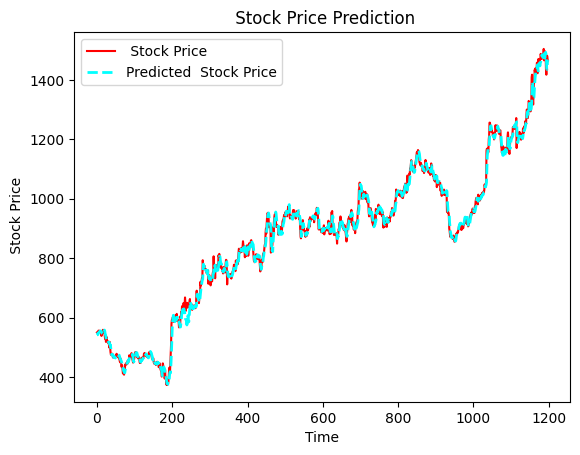

In [14]:
# Plotting
plt.plot(test_label, color = 'red', label = ' Stock Price')
plt.plot(predicted, color = 'cyan', label = 'Predicted  Stock Price', linestyle='dashed', linewidth=2)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

**Metrics**

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE
mse = mean_squared_error(test_label, predicted)
print("Mean Squared Error (MSE):", mse)
# Calculate MAE
mae = mean_absolute_error(test_label, predicted)
print("Mean Absolute Error (MAE):", mae)
# Calculate RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# Calculate MAPE
mape = mean_absolute_percentage_error(test_label, predicted)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 335.9101847255399
Mean Absolute Error (MAE): 12.787044337283353
Root Mean Squared Error (RMSE): 18.327852703618607
Mean Absolute Percentage Error (MAPE): 1.539707769016962
